### FAO Data on Food Production in Suriname

Data from FAO Stat (https://www.fao.org/faostat/en/#data/QCL)

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.getcwd()
os.chdir(r"C:\Users\valer\OneDrive\Dokumente\CVs _ Applications\Correlaid 2021")

In [3]:
food = pd.read_csv("FAOSTAT_data_11-11-2021.csv")

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       1248 non-null   object
 1   Domain            1248 non-null   object
 2   Area Code (FAO)   1248 non-null   int64 
 3   Area              1248 non-null   object
 4   Element Code      1248 non-null   int64 
 5   Element           1248 non-null   object
 6   Item Code (FAO)   1248 non-null   int64 
 7   Item              1248 non-null   object
 8   Year Code         1248 non-null   int64 
 9   Year              1248 non-null   int64 
 10  Unit              1248 non-null   object
 11  Value             1248 non-null   int64 
 12  Flag              647 non-null    object
 13  Flag Description  1248 non-null   object
dtypes: int64(6), object(8)
memory usage: 136.6+ KB


In [5]:
food.head(5)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,207,Suriname,5312,Area harvested,486,Bananas,2010,2010,ha,2081,NaN,Official data
1,QCL,Crops and livestock products,207,Suriname,5312,Area harvested,486,Bananas,2011,2011,ha,2044,NaN,Official data
2,QCL,Crops and livestock products,207,Suriname,5312,Area harvested,486,Bananas,2012,2012,ha,2051,NaN,Official data
3,QCL,Crops and livestock products,207,Suriname,5312,Area harvested,486,Bananas,2013,2013,ha,2173,NaN,Official data
4,QCL,Crops and livestock products,207,Suriname,5312,Area harvested,486,Bananas,2014,2014,ha,2164,NaN,Official data


In [6]:
food.nunique()
#remove domain code, domain, area code and area which are always the same

Domain Code           1
Domain                1
Area Code (FAO)       1
Area                  1
Element Code          8
Element               4
Item Code (FAO)      54
Item                 54
Year Code            10
Year                 10
Unit                  7
Value               874
Flag                  4
Flag Description      5
dtype: int64

In [7]:
food = food.loc[:,"Element Code": "Flag Description"]

In [8]:
food["Item"].value_counts()

Grapefruit (inc. pomelos)               30
Roots and tubers nes                    30
Cabbages and other brassicas            30
Coffee, green                           30
Plantains and others                    30
Fruit, citrus nes                       30
Pineapples                              30
Coconuts                                30
Sweet potatoes                          30
Lemons and limes                        30
Watermelons                             30
Bananas                                 30
Cocoa, beans                            30
Cucumbers and gherkins                  30
Oranges                                 30
Fruit, tropical fresh nes               30
Mangoes, mangosteens, guavas            30
Sugar cane                              30
Papayas                                 30
Tomatoes                                30
Vegetables, fresh nes                   30
Cassava                                 30
Rice, paddy                             30
Cherries   

In [9]:
food["Element"].value_counts()

Production              538
Yield                   350
Area harvested          300
Yield/Carcass Weight     60
Name: Element, dtype: int64

In [10]:
#Find out which items produced most in 2019 (last year)
#include only if "Element" == "Production"

production = food[food["Element"] == "Production"]

In [11]:
production_2019 = production.loc[production["Year"] == 2019]
production_2019.sort_values(by="Value", ascending = False).head(10) #Method for sorting data frames

,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
987,5510,Production,27,"Rice, paddy",2019,2019,tonnes,274266,NaN,Official data
997,5510,Production,30,"Rice, paddy (rice milled equivalent)",2019,2019,tonnes,182935,Fc,Calculated data
1127,5510,Production,156,Sugar cane,2019,2019,tonnes,123690,Im,FAO data based on imputation methodology
299,5513,Production,1067,"Eggs, hen, in shell (number)",2019,2019,1000 No,92025,NaN,Official data
29,5510,Production,486,Bananas,2019,2019,tonnes,48435,NaN,Official data
837,5510,Production,490,Oranges,2019,2019,tonnes,19061,NaN,Official data
1217,5510,Production,463,"Vegetables, fresh nes",2019,2019,tonnes,17077,NaN,Official data
927,5510,Production,489,Plantains and others,2019,2019,tonnes,14851,NaN,Official data
209,5510,Production,249,Coconuts,2019,2019,tonnes,14069,NaN,Official data
619,5510,Production,1058,"Meat, chicken",2019,2019,tonnes,10673,NaN,Official data


Most common crops in 2019: rice, followed by sugar cane, (eggs), bananas, oranges

In [12]:
#Create separate datasets for production of most common items

def new_set(item):
    return production.loc[production["Item"] == item]

rice_production = new_set("Rice, paddy")
sugar_cane_production = new_set("Sugar cane")
banana_production = new_set("Bananas")
orange_production = new_set("Oranges")

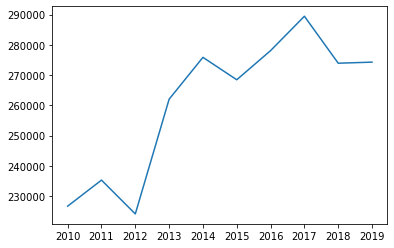

In [13]:
plt.plot(rice_production["Year"], rice_production["Value"])
plt.xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
plt.show()

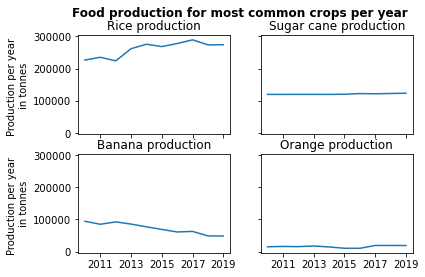

In [14]:
#Creating subplots for different crops

figure, axis = plt.subplots(2, 2, sharey = True) #Creates template for subplots; sharey means that the y-axis is shared for all plots (not scaled individually)

plt.setp(axis, xticks=[2011, 2013, 2015, 2017, 2019]) #to set certain things for all subplots
plt.suptitle("Food production for most common crops per year", fontweight = "bold")
plt.setp(axis, ylabel = "Production per year \nin tonnes")

axis[0,0].plot(rice_production["Year"], rice_production["Value"])
axis[0,0].set_title("Rice production")

axis[0,1].plot(sugar_cane_production["Year"], sugar_cane_production["Value"])
axis[0,1].set_title("Sugar cane production")

axis[1,0].plot(banana_production["Year"], banana_production["Value"])
axis[1,0].set_title("Banana production")

axis[1,1].plot(orange_production["Year"], orange_production["Value"])
axis[1,1].set_title("Orange production")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()



In [15]:
#Looking at yield instead


yield1 = food[food["Element"] == "Yield"]

In [16]:
yield1.head(10)

,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
10,5419,Yield,486,Bananas,2010,2010,hg/ha,453013,Fc,Calculated data
11,5419,Yield,486,Bananas,2011,2011,hg/ha,415934,Fc,Calculated data
12,5419,Yield,486,Bananas,2012,2012,hg/ha,450468,Fc,Calculated data
13,5419,Yield,486,Bananas,2013,2013,hg/ha,393852,Fc,Calculated data
14,5419,Yield,486,Bananas,2014,2014,hg/ha,355887,Fc,Calculated data
15,5419,Yield,486,Bananas,2015,2015,hg/ha,346167,Fc,Calculated data
16,5419,Yield,486,Bananas,2016,2016,hg/ha,306438,Fc,Calculated data
17,5419,Yield,486,Bananas,2017,2017,hg/ha,322002,Fc,Calculated data
18,5419,Yield,486,Bananas,2018,2018,hg/ha,282283,Fc,Calculated data
19,5419,Yield,486,Bananas,2019,2019,hg/ha,283080,Fc,Calculated data


In [17]:
def new_set_yield(item):
    return yield1.loc[yield1["Item"] == item]

rice_yield = new_set_yield("Rice, paddy")
sugar_cane_yield = new_set_yield("Sugar cane")
banana_yield = new_set_yield("Bananas")
orange_yield = new_set_yield("Oranges")

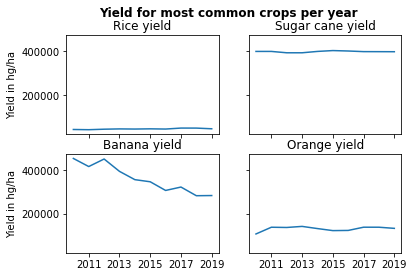

In [18]:
#Creating subplots for different crops

figure, axis = plt.subplots(2, 2, sharey = True) #Creates template for subplots; sharey means that the y-axis is shared for all plots (not scaled individually)

plt.setp(axis, xticks=[2011, 2013, 2015, 2017, 2019]) #to set certain things for all subplots
plt.suptitle("Yield for most common crops per year", fontweight = "bold")
plt.setp(axis, ylabel = "Yield in hg/ha")

axis[0,0].plot(rice_yield["Year"], rice_yield["Value"])
axis[0,0].set_title("Rice yield")

axis[0,1].plot(sugar_cane_yield["Year"], sugar_cane_yield["Value"])
axis[0,1].set_title("Sugar cane yield")

axis[1,0].plot(banana_yield["Year"], banana_yield["Value"])
axis[1,0].set_title("Banana yield")

axis[1,1].plot(orange_yield["Year"], orange_yield["Value"])
axis[1,1].set_title("Orange yield")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axis.flat:
    ax.label_outer()

In [19]:
#Creating subplots using seaborn.relplot

import seaborn as sns

In [24]:
food_sel = food[(food["Item"] == "Rice, paddy") | (food["Item"] == "Sugar cane") | (food["Item"] == "Bananas") | (food["Item"] == "Oranges")]

In [25]:
food_sel

,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,5312,Area harvested,486,Bananas,2010,2010,ha,2081,NaN,Official data
1,5312,Area harvested,486,Bananas,2011,2011,ha,2044,NaN,Official data
2,5312,Area harvested,486,Bananas,2012,2012,ha,2051,NaN,Official data
3,5312,Area harvested,486,Bananas,2013,2013,ha,2173,NaN,Official data
4,5312,Area harvested,486,Bananas,2014,2014,ha,2164,NaN,Official data
...,...,...,...,...,...,...,...,...,...,...
1123,5510,Production,156,Sugar cane,2015,2015,tonnes,120479,Im,FAO data based on imputation methodology
1124,5510,Production,156,Sugar cane,2016,2016,tonnes,122544,Im,FAO data based on imputation methodology
1125,5510,Production,156,Sugar cane,2017,2017,tonnes,121955,Im,FAO data based on imputation methodology
1126,5510,Production,156,Sugar cane,2018,2018,tonnes,122822,Im,FAO data based on imputation methodology


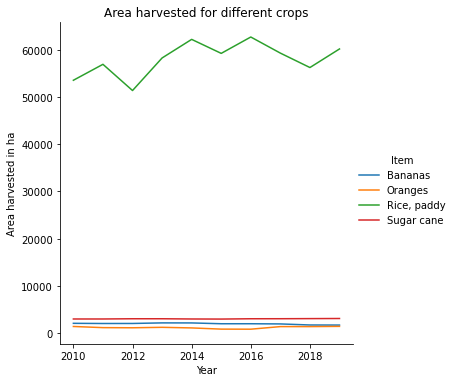

In [36]:
harvest_plot = sns.relplot(data = food_sel[food_sel["Element"] == "Area harvested"], x = "Year", y = "Value", 
            kind = "line", hue = "Item")

harvest_plot.set(xlabel='Year', ylabel='Area harvested in ha')
harvest_plot.set(title = "Area harvested for different crops")

In [37]:
food["Item"].value_counts()

Grapefruit (inc. pomelos)               30
Roots and tubers nes                    30
Cabbages and other brassicas            30
Coffee, green                           30
Plantains and others                    30
Fruit, citrus nes                       30
Pineapples                              30
Coconuts                                30
Sweet potatoes                          30
Lemons and limes                        30
Watermelons                             30
Bananas                                 30
Cocoa, beans                            30
Cucumbers and gherkins                  30
Oranges                                 30
Fruit, tropical fresh nes               30
Mangoes, mangosteens, guavas            30
Sugar cane                              30
Papayas                                 30
Tomatoes                                30
Vegetables, fresh nes                   30
Cassava                                 30
Rice, paddy                             30
Cherries   